In [48]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [49]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [10, 5]})

Implementing VaR using Python. 1. Historical 2.Parametric and 3.MonteCarlo 

In [51]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import quantstats as qs
from scipy.stats import norm
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [52]:
assets = ['ADBE', 'AMD','AMZN','AAPL','GOOG','META','MSFT', 'NFLX','NVDA','TSLA']

In [53]:
assets.sort()

In [54]:
start_date= '2019-07-12'
end_date= '2023-07-12'

In [55]:
n_assets=len(assets)

In [56]:
prices_df=pd.DataFrame()

prices_df= yf.download(assets, start=start_date, end=end_date)

[*********************100%***********************]  10 of 10 completed


In [57]:
prices_df.head().dropna()

Adj Close                                                 
                 AAPL        ADBE        AMD        AMZN       GOOG   
Date                                                                  
2019-07-12  49.311565  309.420013  33.209999  100.550003  57.244999  \
2019-07-15  49.774845  308.760010  34.389999  101.049500  57.516998   
2019-07-16  49.602627  305.700012  33.849998  100.495003  57.679001   
2019-07-17  49.323692  309.390015  33.599998   99.601501  57.317501   
2019-07-18  49.883991  310.079987  33.000000   98.894997  57.316502   

                                                                      ...   
                  META        MSFT        NFLX       NVDA       TSLA  ...   
Date                                                                  ...   
2019-07-12  204.869995  133.504562  373.250000  41.674480  16.338667  ...  \
2019-07-15  203.910004  133.504562  366.600006  41.589935  16.900000  ...   
2019-07-16  203.839996  131.755310  365.989990  41.542690  16.825333  ...   
2019-07-17  201.800003  130.976715  362.440002  42.196617  16.990667  ...   
2019-07-18  200.779999  131.120926  325.209991  42.313480  16.902666  ...   

              Volume                                                    
                AAPL     ADBE       AMD      AMZN      GOOG      META   
Date                                                                    
2019-07-12  70380800  1624800  51509700  50186000  17280000  15366300  \
2019-07-15  67789600  1161600  65565200  59626000  18076000  16030300   
2019-07-16  67467200  1838700  66912700  52364000  24776000  12132700   
2019-07-17  56430000  2298100  42557900  51176000  23400000  12083700   
2019-07-18  74162400  1597200  58473900  69738000  25814000  11937900   

                                                     
                MSFT      NFLX      NVDA       TSLA  
Date                                                 
2019-07-12  18936800   6636900  50639200  138007500  
2019-07-15  16651500   7944700  28984000  165001500  
2019-07-16  22726100   5863200  34144400  122235000  
2019-07-17  20211000  13639500  34820400  146470500  
2019-07-18  30381800  31287100  44219200   71379000  

[5 rows x 60 columns]

In [58]:
prices_df.tail().dropna()

Adj Close                                                   
                  AAPL        ADBE         AMD        AMZN        GOOG   
Date                                                                     
2023-07-05  191.330002  487.260010  113.949997  130.380005  122.629997  \
2023-07-06  191.809998  481.290009  113.480003  128.360001  120.930000   
2023-07-07  190.679993  485.269989  113.169998  129.779999  120.139999   
2023-07-10  188.610001  496.350006  113.580002  127.129997  116.870003   
2023-07-11  188.080002  504.739990  111.320000  128.779999  117.709999   

                                                                        ...   
                  META        MSFT        NFLX        NVDA        TSLA  ...   
Date                                                                    ...   
2023-07-05  294.369995  338.149994  445.899994  423.170013  282.480011  ...  \
2023-07-06  291.989990  341.269989  438.839996  421.029999  276.540009  ...   
2023-07-07  290.529999  337.220001  438.100006  425.029999  274.429993  ...   
2023-07-10  294.100006  331.829987  441.709991  421.799988  269.609985  ...   
2023-07-11  298.290009  332.470001  440.209991  424.049988  269.790009  ...   

              Volume                                                    
                AAPL     ADBE       AMD      AMZN      GOOG      META   
Date                                                                    
2023-07-05  46920300  2190000  49501600  35895400  17830300  33865500  \
2023-07-06  45094300  2100900  42342000  40639900  17732500  47600500   
2023-07-07  46778000  2324500  37135100  41928700  20982400  25546200   
2023-07-10  59922200  3352600  49330200  61889300  32960100  37058300   
2023-07-11  46638100  2844200  59899500  49951500  18286600  27585900   

                                                    
                MSFT     NFLX      NVDA       TSLA  
Date                                                
2023-07-05  18172400  6869500  32361800  131530900  
2023-07-06  28161200  4938800  30358200  120332100  
2023-07-07  21185300  4160100  35525300  113602000  
2023-07-10  32791400  4251700  35390800  119425400  
2023-07-11  26698200  4574600  29824400   91972400  

[5 rows x 60 columns]

In [59]:
prices_df["Adj Close"].head().dropna()

,AAPL,ADBE,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,,
2019-07-12,49.311565,309.420013,33.209999,100.550003,57.244999,204.869995,133.504562,373.250000,41.674480,16.338667
2019-07-15,49.774845,308.760010,34.389999,101.049500,57.516998,203.910004,133.504562,366.600006,41.589935,16.900000
2019-07-16,49.602627,305.700012,33.849998,100.495003,57.679001,203.839996,131.755310,365.989990,41.542690,16.825333
2019-07-17,49.323692,309.390015,33.599998,99.601501,57.317501,201.800003,130.976715,362.440002,42.196617,16.990667
2019-07-18,49.883991,310.079987,33.000000,98.894997,57.316502,200.779999,131.120926,325.209991,42.313480,16.902666


In [60]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh
cf.go_offline()
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [61]:
prices_df['Adj Close'].iplot()

In [62]:
returns= prices_df['Adj Close'].pct_change().dropna()

In [63]:
returns

,AAPL,ADBE,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,,
2019-07-15,0.009395,-0.002133,0.035531,0.004968,0.004751,-0.004686,0.000000,-0.017816,-0.002029,0.034356
2019-07-16,-0.003460,-0.009911,-0.015702,-0.005487,0.002817,-0.000343,-0.013103,-0.001664,-0.001136,-0.004418
2019-07-17,-0.005623,0.012071,-0.007386,-0.008891,-0.006267,-0.010008,-0.005909,-0.009700,0.015741,0.009827
2019-07-18,0.011360,0.002230,-0.017857,-0.007093,-0.000017,-0.005055,0.001101,-0.102720,0.002769,-0.005179
2019-07-19,-0.014928,-0.010352,-0.014849,-0.006765,-0.014158,-0.012053,0.001466,-0.031088,-0.010224,0.018301
...,...,...,...,...,...,...,...,...,...,...
2023-07-05,-0.005871,0.004225,-0.016146,0.001229,0.017170,0.029194,0.000473,0.010103,-0.002263,0.009506
2023-07-06,0.002509,-0.012252,-0.004125,-0.015493,-0.013863,-0.008085,0.009227,-0.015833,-0.005057,-0.021028
2023-07-07,-0.005891,0.008269,-0.002732,0.011063,-0.006533,-0.005000,-0.011867,-0.001686,0.009501,-0.007630


In [64]:
returns.iplot()

In [65]:
returns.describe()

,AAPL,ADBE,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,0.001560,0.000790,0.001778,0.000514,0.000934,0.000809,0.001116,0.000649,0.002887,0.003717
std,0.021339,0.024560,0.033976,0.023144,0.020840,0.029221,0.020399,0.030482,0.034115,0.043000
min,-0.128647,-0.167932,-0.146390,-0.140494,-0.111008,-0.263901,-0.147390,-0.351166,-0.184521,-0.210628
25%,-0.008826,-0.010993,-0.017264,-0.011703,-0.009061,-0.012062,-0.009118,-0.014110,-0.015394,-0.017937
50%,0.001140,0.001521,0.000252,0.000551,0.001058,0.000701,0.000736,0.000422,0.003011,0.002635
75%,0.013478,0.013567,0.020597,0.012220,0.011168,0.014532,0.011784,0.014825,0.021507,0.024619
max,0.119808,0.177193,0.165016,0.135359,0.104485,0.232824,0.142169,0.168543,0.243696,0.198949


1. Historical VaR

In [66]:
# We calculate  daily log returns

log_returns = np.log(prices_df / prices_df.shift(1))['Adj Close']
log_returns = log_returns.dropna()
print(log_returns)

                AAPL      ADBE       AMD      AMZN      GOOG      META   
Date                                                                     
2019-07-15  0.009351 -0.002135  0.034915  0.004955  0.004740 -0.004697  \
2019-07-16 -0.003466 -0.009960 -0.015827 -0.005502  0.002813 -0.000343   
2019-07-17 -0.005639  0.011998 -0.007413 -0.008931 -0.006287 -0.010058   
2019-07-18  0.011296  0.002228 -0.018018 -0.007119 -0.000017 -0.005067   
2019-07-19 -0.015040 -0.010406 -0.014960 -0.006788 -0.014259 -0.012126   
...              ...       ...       ...       ...       ...       ...   
2023-07-05 -0.005889  0.004216 -0.016278  0.001228  0.017024  0.028776   
2023-07-06  0.002506 -0.012328 -0.004133 -0.015614 -0.013960 -0.008118   
2023-07-07 -0.005909  0.008235 -0.002736  0.011002 -0.006554 -0.005013   
2023-07-10 -0.010915  0.022576  0.003616 -0.020631 -0.027595  0.012213   
2023-07-11 -0.002814  0.016762 -0.020099  0.012895  0.007162  0.014146   

                MSFT      NFLX      N

In [67]:
# We create an Equally Weighted Portfolio

portfolio_value = 1000000
weights = np.array([1/len(assets)]*len(assets))
print(weights) 

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


We calculate Historical Portfolio Returns

In [68]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2019-07-15    0.006090
2019-07-16   -0.005271
2019-07-17   -0.001661
2019-07-18   -0.012641
2019-07-19   -0.009584
                ...   
2023-07-05    0.004680
2023-07-06   -0.008475
2023-07-07   -0.001280
2023-07-10   -0.005399
2023-07-11    0.003257
Length: 1005, dtype: float64


In [69]:
#We find the x-day Historical Returns

days = 5

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2019-07-19   -0.023066
2019-07-22   -0.020955
2019-07-23   -0.008229
2019-07-24    0.004582
2019-07-25   -0.004542
                ...   
2023-07-05    0.031850
2023-07-06    0.019403
2023-07-07    0.020642
2023-07-10   -0.004757
2023-07-11   -0.007217
Length: 1001, dtype: float64


In [70]:
# We calculate de VaR using Historical Method with 90% confidence level

confidence_interval = 0.90

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

50846.470785645295


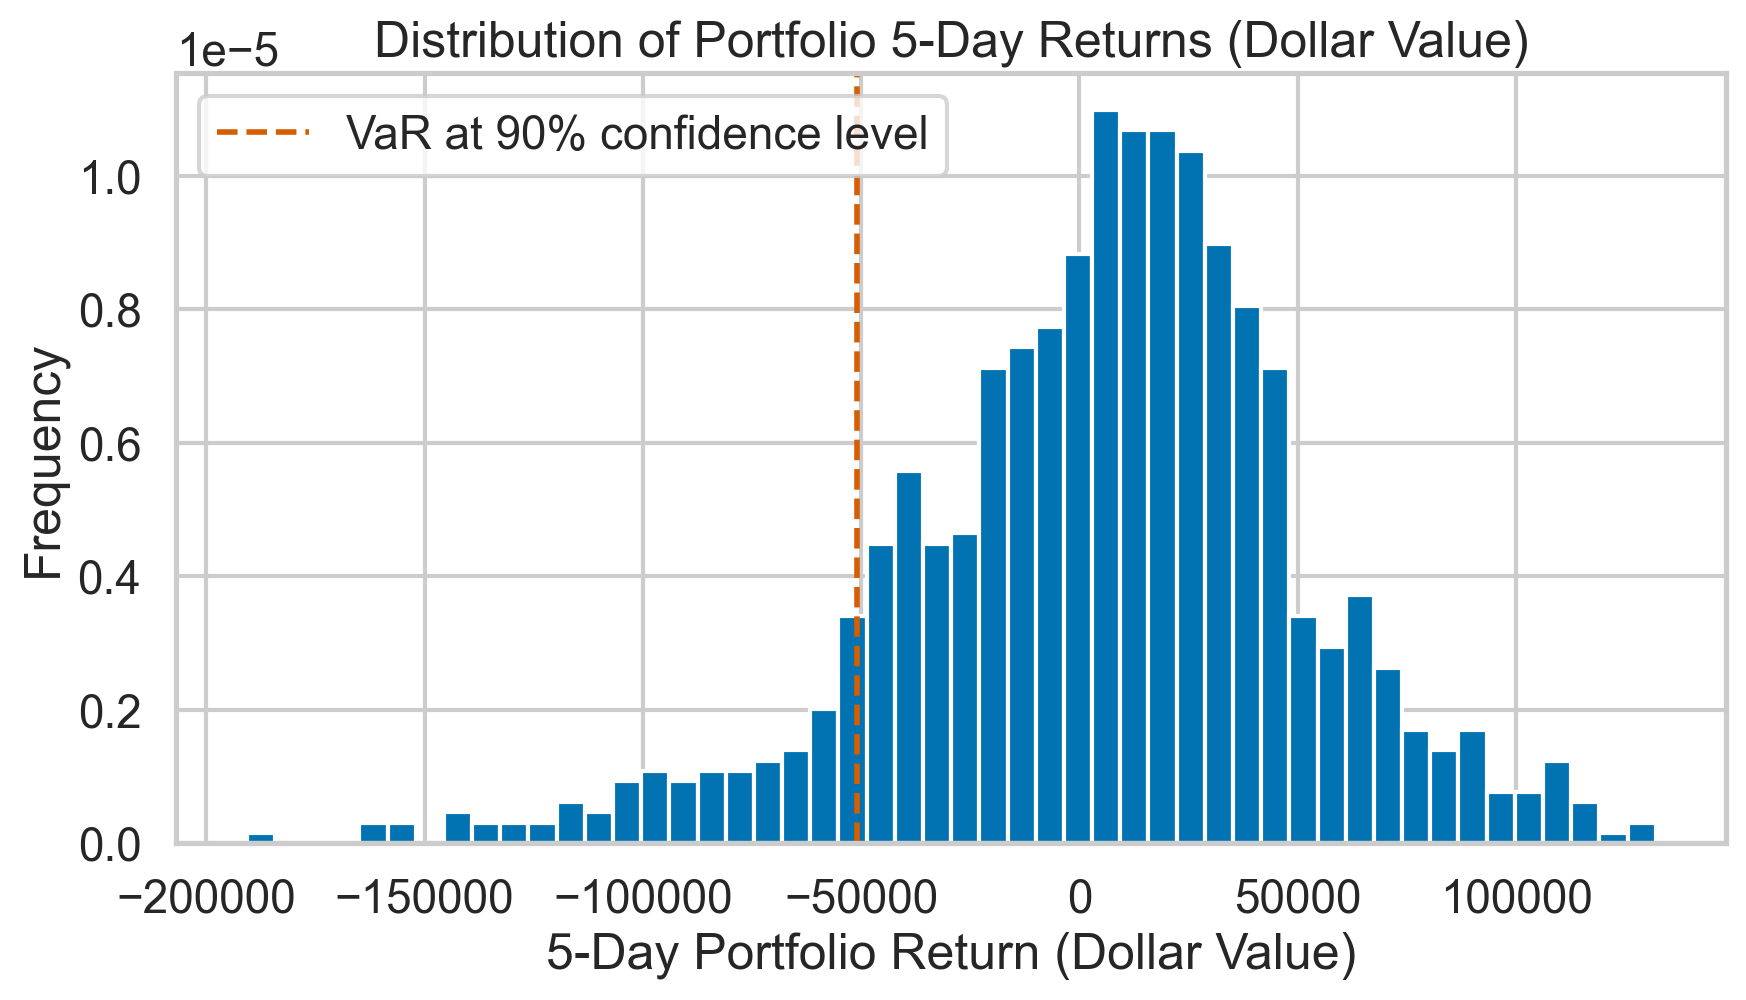

In [71]:
#We plot the results of the Historical Returns to visualize the distribution of portfolio returns and the VaR at the 90% confifence level

import matplotlib.pyplot as plt

return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

In [72]:
# We calculate de VaR using Historical Method with 95% confidence level

confidence_interval = 0.95

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

77568.84600833982


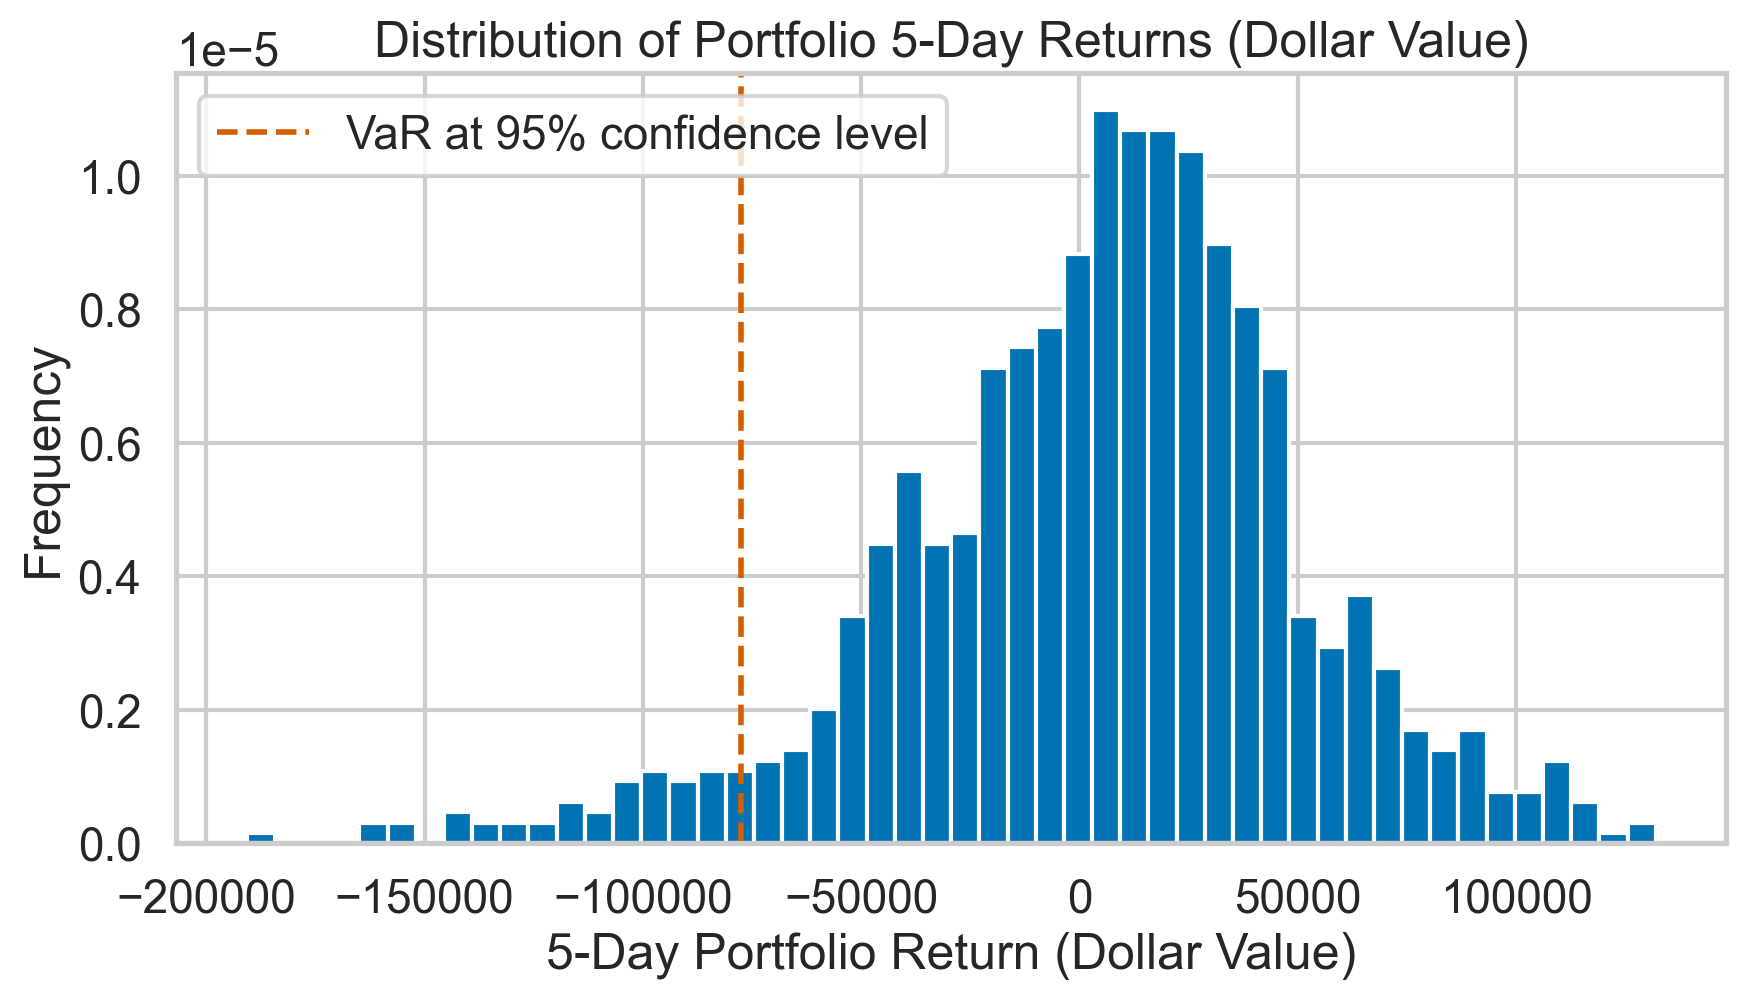

In [73]:
#We plot the results of the Historical Returns to visualize the distribution of portfolio returns and the VaR at the 95% confifence level

import matplotlib.pyplot as plt

return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

In [74]:
# We calculate de VaR using Historical Method with 99% confidence level

confidence_interval = 0.99

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

129399.49728976887


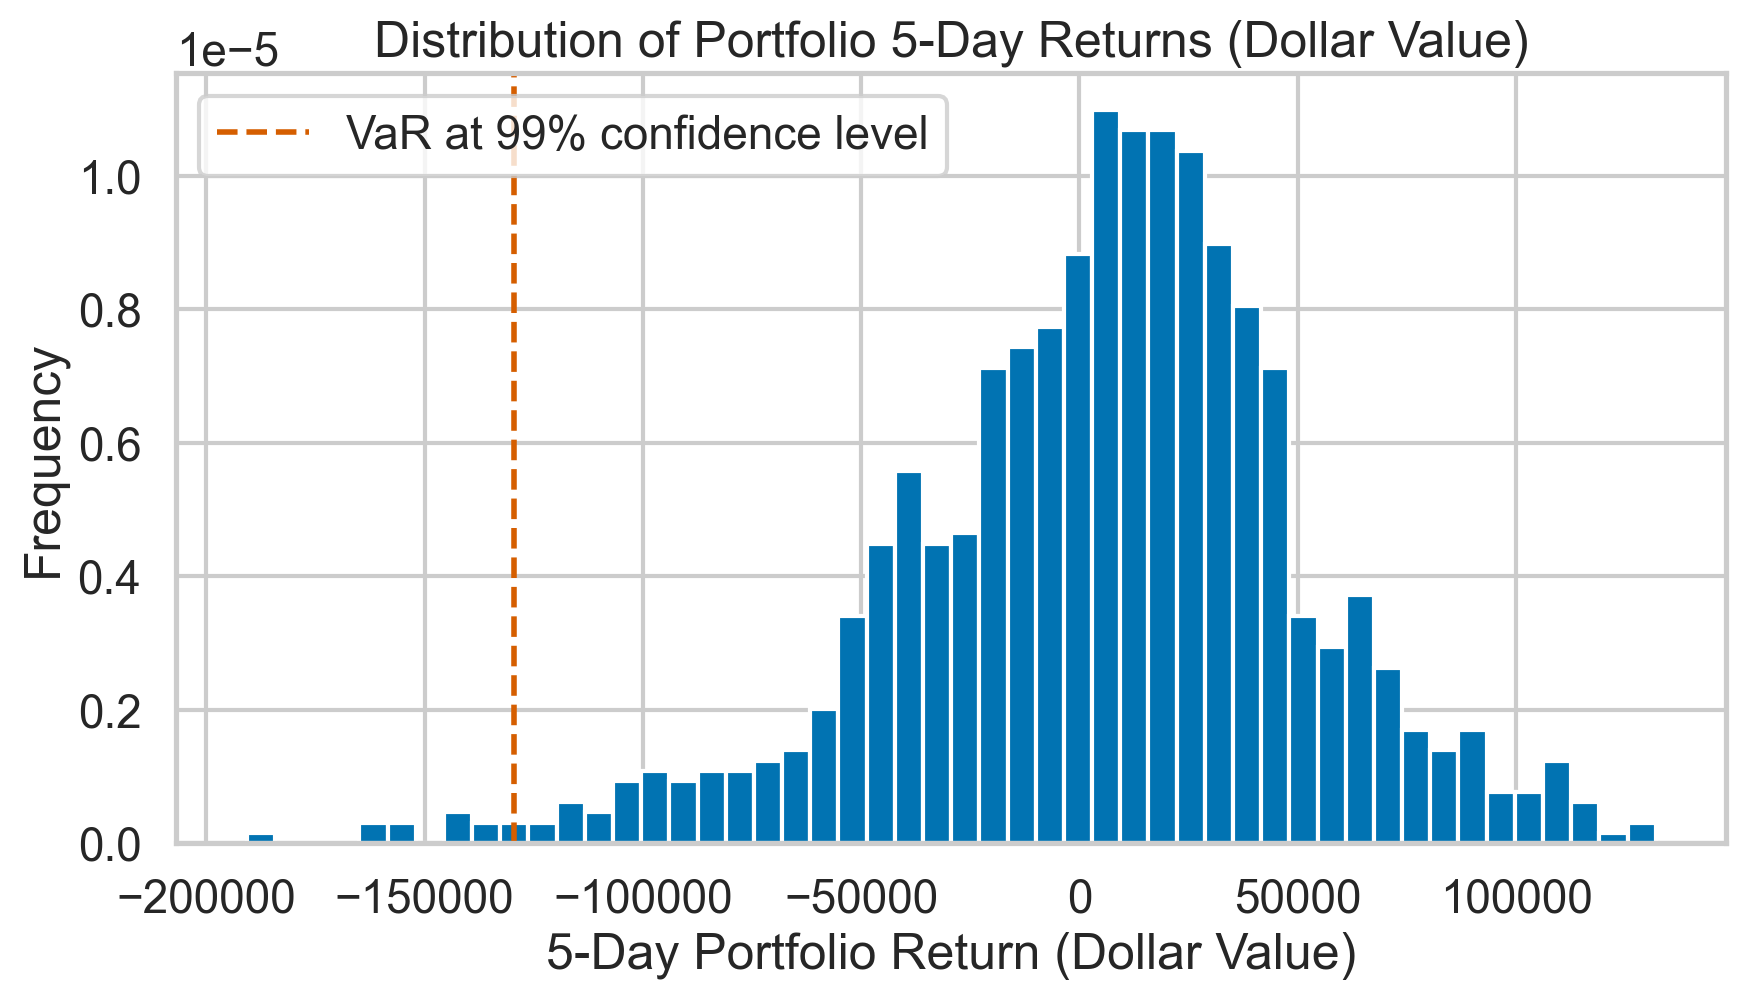

In [75]:
#We plot the results of the Historical Returns to visualize the distribution of portfolio returns and the VaR at the 99% confifence level

import matplotlib.pyplot as plt

return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

2. Parametric VaR

In [76]:
#We create a Covariance Matrix and calculate the portfolio standard deviation

cov_matrix = log_returns.cov() * 252
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

In [77]:
cov_matrix

,AAPL,ADBE,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
AAPL,0.114655,0.091857,0.111460,0.080194,0.078562,0.096105,0.085985,0.078154,0.124421,0.118952
ADBE,0.091857,0.153748,0.130941,0.092532,0.089167,0.110850,0.099326,0.100811,0.147747,0.125228
AMD,0.111460,0.130941,0.288873,0.114780,0.104571,0.127628,0.112887,0.119881,0.227296,0.177072
AMZN,0.080194,0.092532,0.114780,0.135018,0.081420,0.106217,0.082942,0.102282,0.123181,0.114548
GOOG,0.078562,0.089167,0.104571,0.081420,0.109323,0.104711,0.085201,0.077395,0.116654,0.096895
META,0.096105,0.110850,0.127628,0.106217,0.104711,0.222313,0.095856,0.120293,0.141950,0.114901
MSFT,0.085985,0.099326,0.112887,0.082942,0.085201,0.095856,0.104969,0.077101,0.128817,0.106206
NFLX,0.078154,0.100811,0.119881,0.102282,0.077395,0.120293,0.077101,0.251115,0.130821,0.131528
NVDA,0.124421,0.147747,0.227296,0.123181,0.116654,0.141950,0.128817,0.130821,0.289526,0.194681
TSLA,0.118952,0.125228,0.177072,0.114548,0.096895,0.114901,0.106206,0.131528,0.194681,0.465718


In [78]:
cov_matrix.iplot()

In [79]:
#We calculate VaR at Different Confidence Levels

from scipy.stats import norm

confidence_levels = [0.90, 0.95, 0.99]

VaRs = []
for cl in confidence_levels:
    VaR = portfolio_value * portfolio_std_dev * norm.ppf(cl) * np.sqrt(days / 252)
    VaRs.append(VaR)

In [80]:
#We get the VaR Results

print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)

for cl, VaR in zip(confidence_levels, VaRs):
    print(f'{cl * 100:>6.0f}%: {"":<8} ${VaR:>10,.2f}')

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $ 63,297.98
    95%:          $ 81,242.07
    99%:          $114,902.21


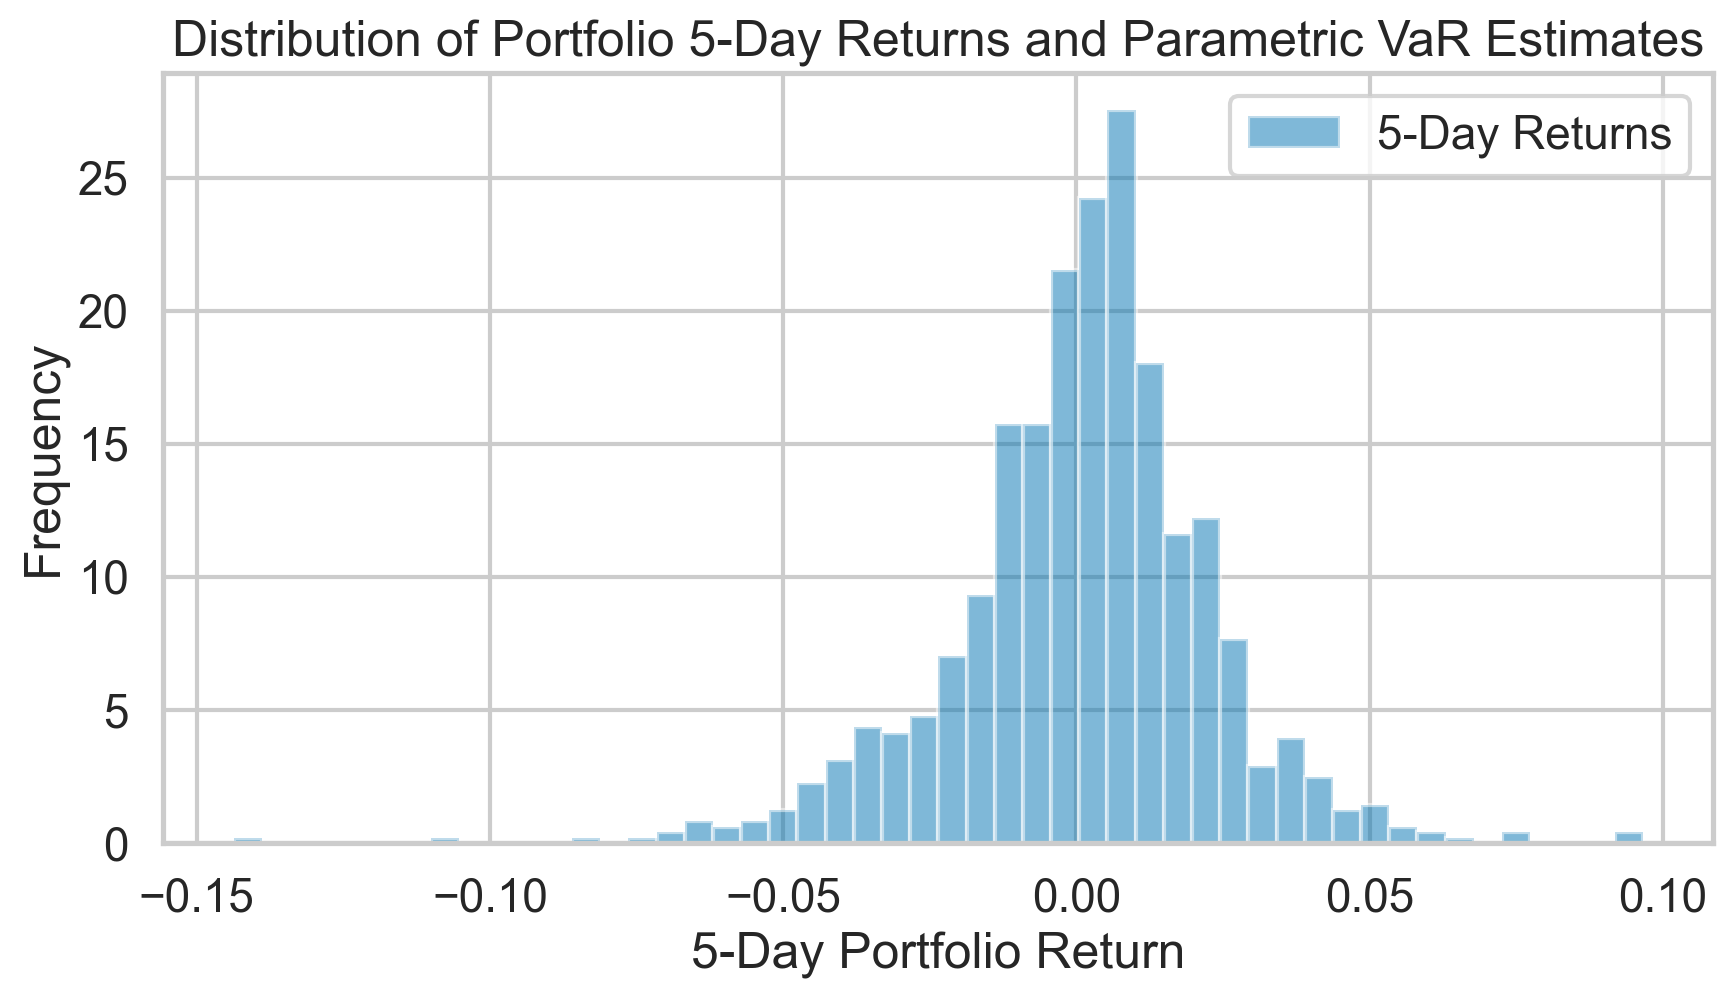

In [81]:
#We plot the distribution of Portfolio Returns and Parametric VaR estimates

plt.hist(historical_returns, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

plt.xlabel(f'{days}-Day Portfolio Return')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()

3. VaR using MonteCarlo Simulation

In [82]:
### Create a function that will be used to calculate portfolio expected return
###We are assuming that future returns are based on past returns, which is not a reliable assumption.

def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)


In [83]:
def standard_deviation(weights, cov_matrix):
    variance= weights. T @ cov_matrix @ weights
    return np.sqrt(variance)

In [84]:
cov_matrix=log_returns.cov()
print(cov_matrix)

          AAPL      ADBE       AMD      AMZN      GOOG      META      MSFT   
AAPL  0.000455  0.000365  0.000442  0.000318  0.000312  0.000381  0.000341  \
ADBE  0.000365  0.000610  0.000520  0.000367  0.000354  0.000440  0.000394   
AMD   0.000442  0.000520  0.001146  0.000455  0.000415  0.000506  0.000448   
AMZN  0.000318  0.000367  0.000455  0.000536  0.000323  0.000421  0.000329   
GOOG  0.000312  0.000354  0.000415  0.000323  0.000434  0.000416  0.000338   
META  0.000381  0.000440  0.000506  0.000421  0.000416  0.000882  0.000380   
MSFT  0.000341  0.000394  0.000448  0.000329  0.000338  0.000380  0.000417   
NFLX  0.000310  0.000400  0.000476  0.000406  0.000307  0.000477  0.000306   
NVDA  0.000494  0.000586  0.000902  0.000489  0.000463  0.000563  0.000511   
TSLA  0.000472  0.000497  0.000703  0.000455  0.000385  0.000456  0.000421   

          NFLX      NVDA      TSLA  
AAPL  0.000310  0.000494  0.000472  
ADBE  0.000400  0.000586  0.000497  
AMD   0.000476  0.000902  0.00

In [85]:
#Calculating Portfolio Expected Return and Standard Deviation

### Create an equally weighted portfolio and find total portfolio expected return and standard deviation
portfolio_value = 1000000
weights = np.array([1/len(assets)]*len(assets))
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

In [86]:
#Defining Functions for MonteCarlo Simulation

def random_z_score():
    return np.random.normal(0, 1)

In [87]:
### Create a function to calculate scenarioGainLoss
days = 5

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

We run MonteCarlo Simulation

In [88]:
### Run 10000 simulations
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

We calculate VaR witn MonteCarlo Simulation

In [89]:
### Specify a confidence interval and calculate the Value at Risk (VaR)
confidence_interval = 0.90
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

58240.4564796913


We plot the Results

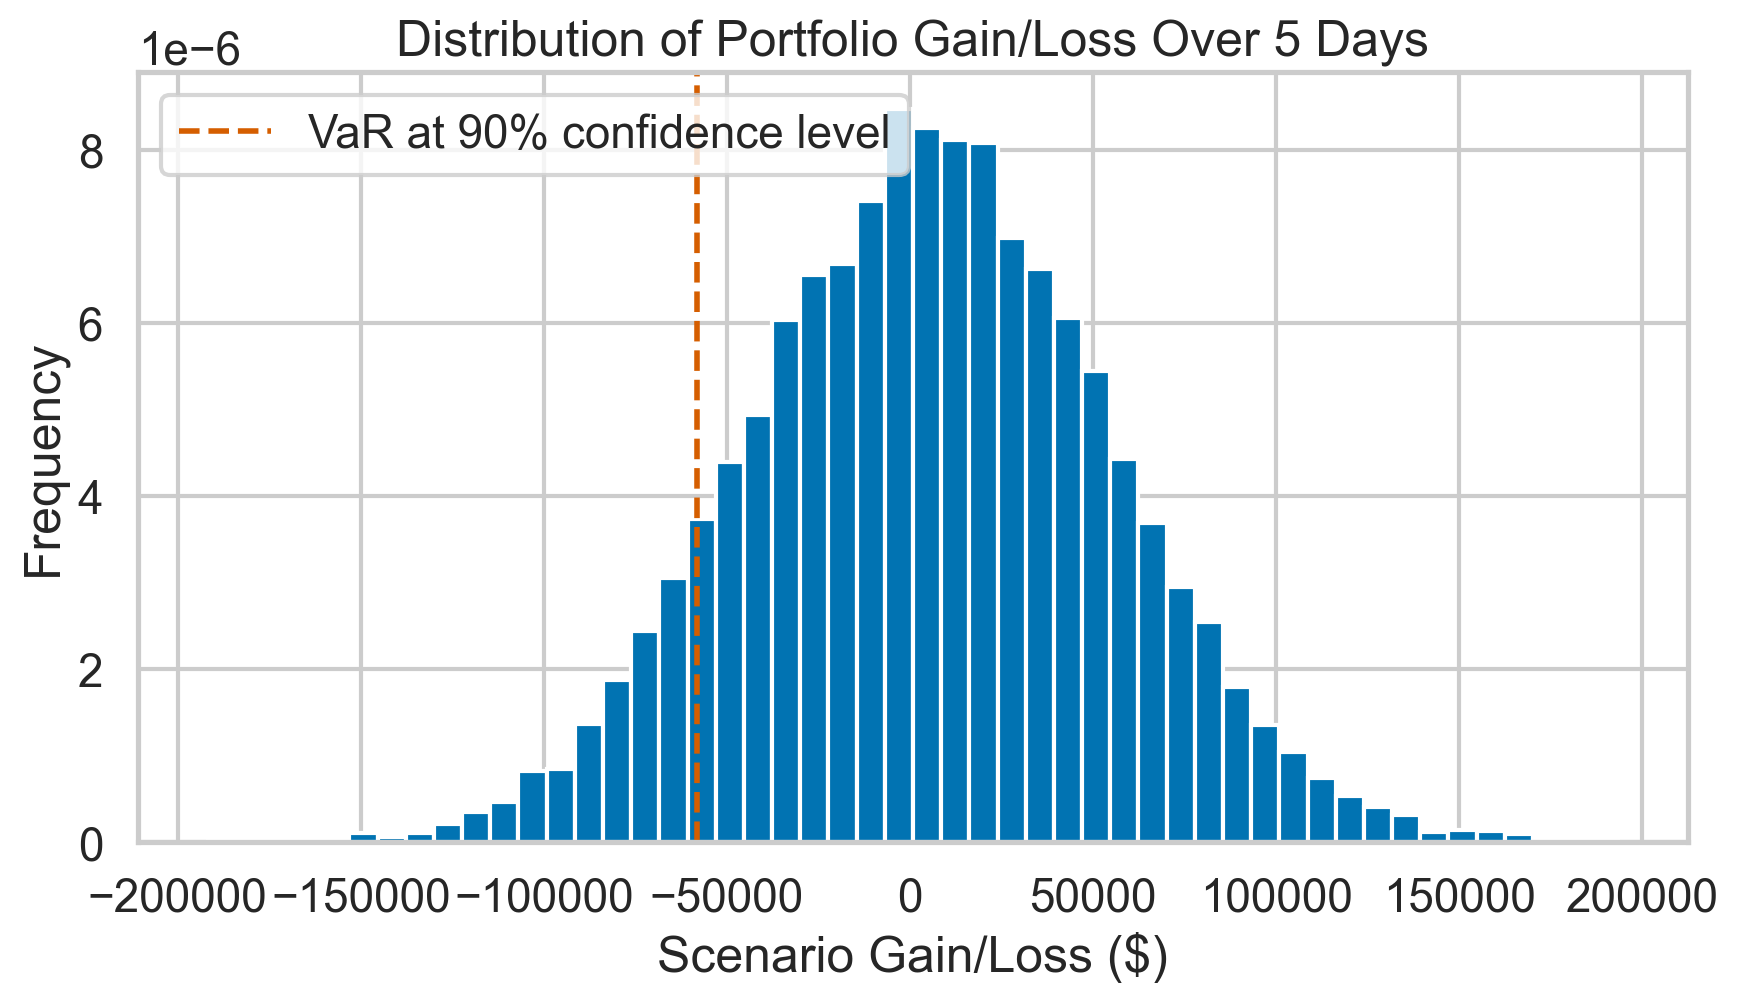

In [90]:
### Plot the results of all 10000 scenarios
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

In [91]:
### Specify a confidence interval and calculate the Value at Risk (VaR)
confidence_interval = 0.95
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

75658.07967997933


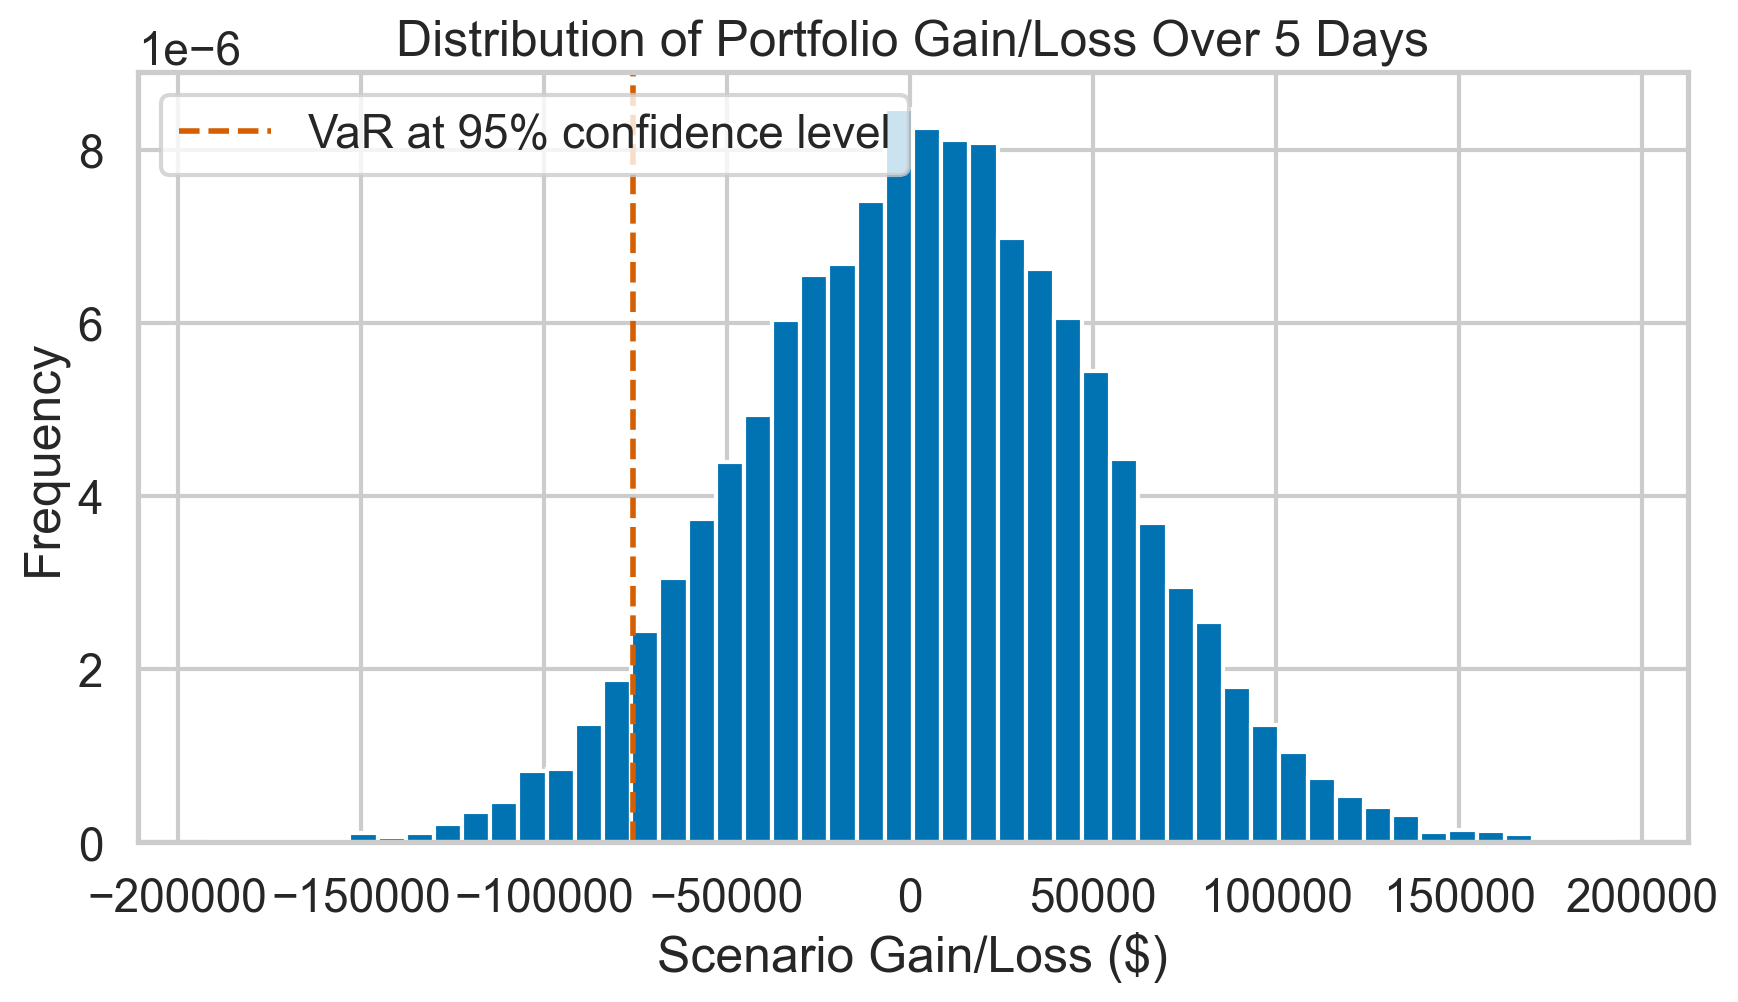

In [92]:
### Plot the results of all 10000 scenarios
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

In [93]:
### Specify a confidence interval and calculate the Value at Risk (VaR)
confidence_interval = 0.99
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

108942.04214073483


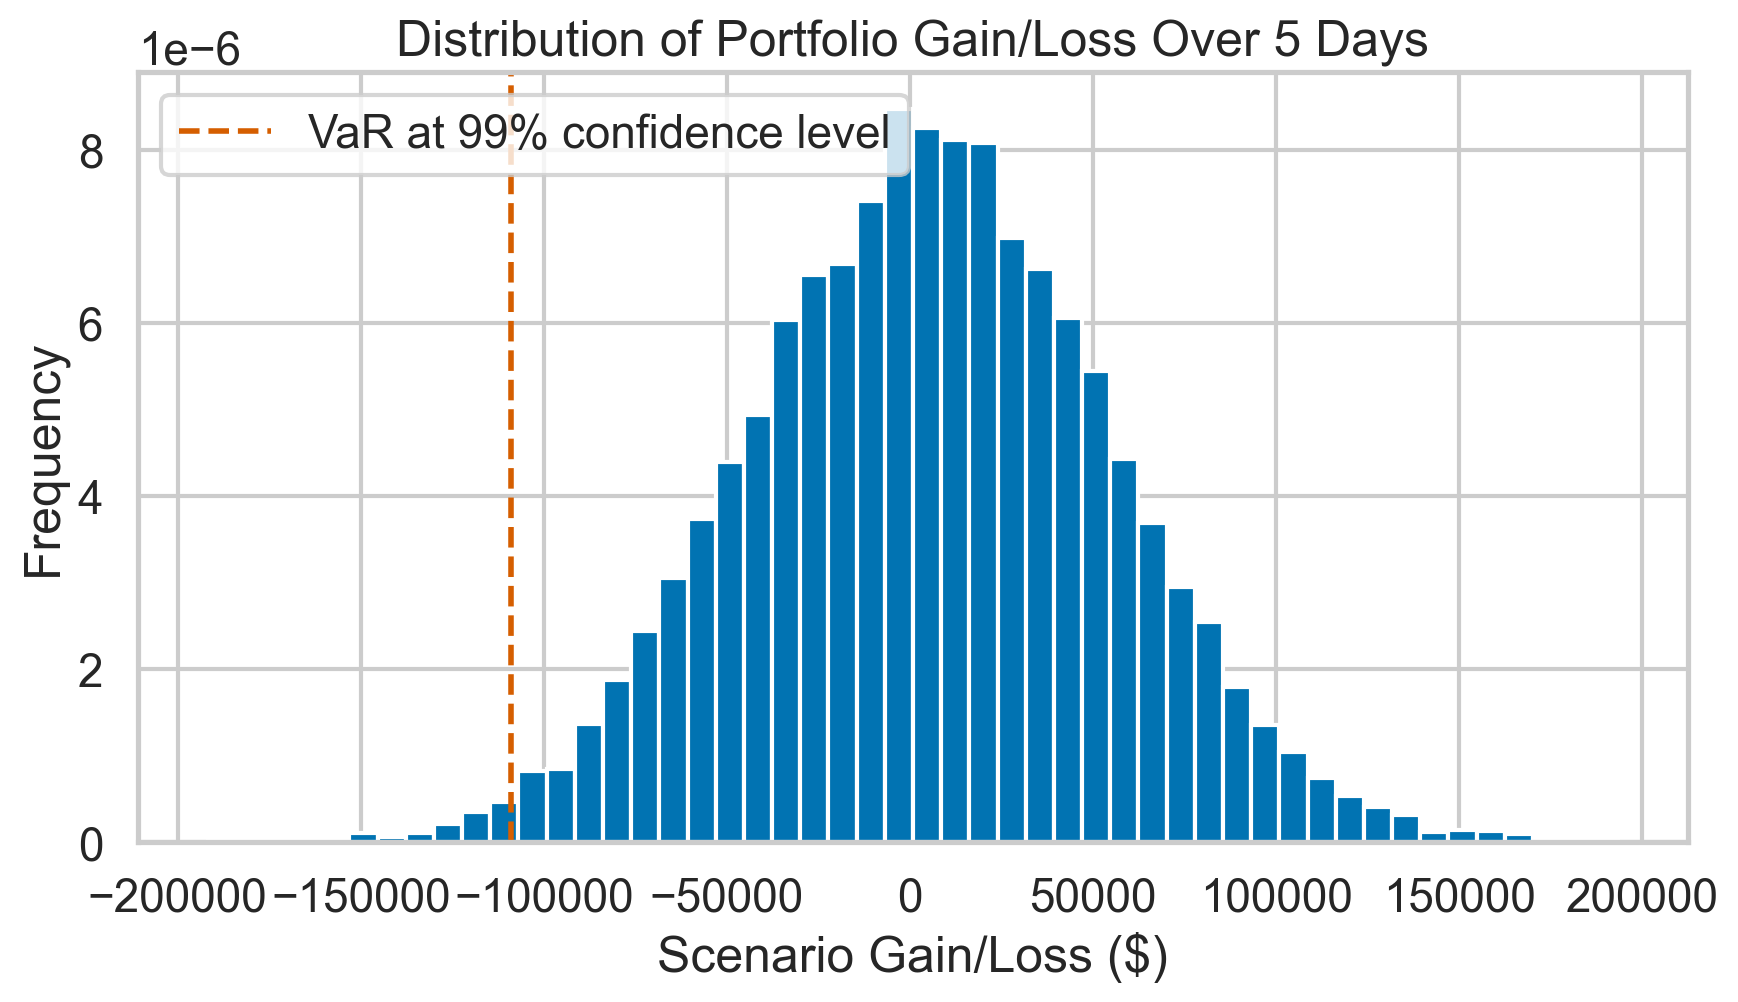

In [94]:
### Plot the results of all 10000 scenarios
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()